# Final Project - Phishing URL Classification: Data Loading

#### Analysis of URL Structure

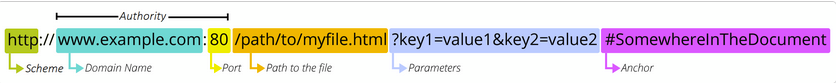

#### Collect and Parse Through Data

#### **Research Questions**

How do I know if a URL (Uniform Resource Locator) is legit?

#### **Hypothesis**

If a URL is longer in size, contains spelling mistakes, and doesn't include certain parts a URL should then the URL must not be legit.

#### **Dataset**

- **Why was the dataset created:** Information about the reasoning for the dataset being created is scarce, but, judging from the sheer size of the dataset and limited number of features, I would assume that the dataset was created for the use of practice in different areas of machine learning (NLP, Deep Learning, Binary Classification, Data Cleaning, etc.)

- **Who Created it:** Hari sudhan411

- **Explanation of features and Target Variables:** There are only two features included in the intial dataset: one is the URL (Uniform Resource Locator) and the other is the status of the URL which tells if the URL is a legit URL or not (this is the target variable)

**Created CSVs**
- **new_data_urls.csv:** this csv is the original dataset downloaded from Kaggle
- **parsed_url_features.csv:** this csv contains all of the features needed for the analysis, but not all cleaned
- **clean_data.csv:** this csv is the final iteration of all collected/created features that have been preprocessed and cleaned

Import Statments

In [1]:
%pip install url-parser
%pip install autocorrect

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import re
from zipfile import ZipFile
from url_parser import parse_url, get_url, get_base_url
import socket
import time
from autocorrect import Speller

Read, Clean/Transform, and Sample Data

In [2]:
data_file ='new_urls.zip'
emails = []
with ZipFile(data_file, 'r') as urls:
    with urls.open('new_data_urls.csv') as myfile:
        urls = pd.read_csv(myfile)

In [4]:
urls.head(10)

,url,status
0,0000111servicehelpdesk.godaddysites.com,0
1,000011accesswebform.godaddysites.com,0
2,00003.online,0
3,0009servicedeskowa.godaddysites.com,0
4,000n38p.wcomhost.com,0
5,000n38t.wcomhost.com,0
6,000n8pc.wcomhost.com,0
7,000ne9r.wcomhost.com,0
8,000njep.wcomhost.com,0
9,000nku9.wcomhost.com,0


In [5]:
urls = urls.drop(urls.head(1665).index)

In [6]:
legit_only = urls[urls["status"] == 1]
phish_only = urls[urls["status"] == 0]

In [7]:
legit_only

,url,status
178574,http://www.crestonwood.com/router.php,1
178577,http://rgipt.ac.in,1
178578,http://www.iracing.com/tracks/gateway-motorspo...,1
178580,http://www.mutuo.it,1
178582,http://vamoaestudiarmedicina.blogspot.com/,1
...,...,...
725609,http://www.bingapis.com/images/search?q=OSI+Mo...,1
725610,http://www.meltinfo.com/xls/osi-model-acronym-...,1
725611,http://search.yahoo.com/tablet/s?p=7+layers+of...,1
725612,http://quiz2play.com/osi-model-quiz,1


In [8]:
phish_only= phish_only.sample(n=49_400)
legit_only = legit_only.sample(n=50_600)

In [9]:
urls = pd.concat([phish_only, legit_only])
urls

,url,status
812902,teslafilm.com,0
93141,https://www.mericori-logining.sf6safh.man1on.asia,0
93081,http://www.z.mauofcg.com,0
730994,http://www.eddylacoste.com/webscrpypl/,0
172780,http://zozozonline100.xyz/,0
...,...,...
714808,http://encyclopedia2.thefreedictionary.com/mem...,1
442686,walterfootball.com/offseason2009cin.php,1
588519,nbcactionnews.com/dpp/traffic/SB-I-435-closed-...,1
629489,theautochannel.com/news/2003/02/16/155224.html,1


**First Set of Features** - count of a Variety of Puncutuation Symbols
The puncutation symbols are as follows: 
- period (.)
- hyphen (-)
- underscore (_) 
- slash (/)
- question mark (?)
- equals (=)
- at (@)
- and (&)
- exclamation (!)


In [3]:
def getCountOfSymbol(df_urls, symbol):
    """
    getCountOfSymbol function takes in a string and counts the amount
    of times that symbol appears in a given url 

    :param df_urls: dataframe containing the intial URLs
    :param symbol: string to look for in the URL
    :return: a list where each entry is the count for a symbol
    in the given url
    """ 
    count = 0
    count_list = []
    for url in df_urls.tolist():
        count = 0
        for character in url:
            if character is symbol:
                count += 1
        count_list.append(count)
    return count_list

Second Feature - Gets the Length of the URL

In [4]:
def getLength(data):
    """
    getLength function takes in a string and counts the
    amount of elements in it

    :param data: the given URL to count (or it cna be another string)
    :return: a list where each entry is the count for the entire URL/string
    """ 
    count_list = []
    for urls in data:
        count_list.append(len(urls))
    return count_list

**Third Set of Features:** Adds in the parts of a URL the current URL displays
- For Example, https://rakutenluyaw.ouxawer-p.net/ has a protocol of https
- There displayed at the beginning of the notebook, there is a diagram splitting up the main parts of a URL

In [12]:
urls

,url,status
812902,teslafilm.com,0
93141,https://www.mericori-logining.sf6safh.man1on.asia,0
93081,http://www.z.mauofcg.com,0
730994,http://www.eddylacoste.com/webscrpypl/,0
172780,http://zozozonline100.xyz/,0
...,...,...
714808,http://encyclopedia2.thefreedictionary.com/mem...,1
442686,walterfootball.com/offseason2009cin.php,1
588519,nbcactionnews.com/dpp/traffic/SB-I-435-closed-...,1
629489,theautochannel.com/news/2003/02/16/155224.html,1


In [13]:
original = urls

In [14]:
sample_df = urls
components = {"url": None,
            "protocol": None,
             "www_present": None,
             "sub_domain": None,
             "domain": None,
             "top_domain": None,
             "dir": None,
             "file": None,
             "path": None,
             "fragment": None,
             "query": None}
comp = pd.DataFrame(components, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [15]:
def identify_url_components(urls, df, new_df):
    """
    identify_url_components function takes a URL and splits it into the
    parts of a URL: protocol, www, sub_domain, domain, top_domain, dir, 
    file, path, fragment, and query. If there is a error in the library
    used to read the URL, all of the parts are labeled NONE. 

    :param url: the list/Series of url's in the original dataset
    :param df: a copy of the original dataset "urls"
    :param new_df: a blank dataframe that has all of the features listed
    within the url 
    :return: a new DataFrame that has rows pertaining to their own urls
    """ 
    count = 0
    for index, row in df.iterrows(): 
        count+=1
        print(index)
        print(count)
        try:
            o = get_url(row["url"])
            cur_row = {"url": row["url"],
            "protocol": o.protocol,
             "www_present": o.www,
             "sub_domain": o.sub_domain,
             "domain": o.domain,
             "top_domain": o.top_domain,
             "dir": o.dir,
             "file": o.file,
             "path": o.path,
             "fragment": o.fragment,
             "query": o.query,
            "status": row["status"]}
            new_df=new_df.append(cur_row, ignore_index=True)
            continue
        except (TypeError, AttributeError):
            cur_row = {"url": row["url"],
            "protocol": None,
             "www_present": None,
             "sub_domain": None,
             "domain": None,
             "top_domain": None,
             "dir": None,
             "file": None,
             "path": None,
             "fragment": None,
             "query": None,
            "status": None}
            new_df=new_df.append(cur_row, ignore_index=True)
            continue
    return new_df

In [ ]:
parse_url = identify_url_components(urls["url"], sample_df, comp) #takes a while (about )

In [17]:
parse_url.to_csv("parsed_url_features_4.csv", encoding='utf-8')

#### Check the Status if Added Features

In [5]:
feat_df = pd.read_csv("parsed_url_features_4.csv")
feat_df.head(12)

/tmp/ipykernel_3705763/1553328040.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  feat_df = pd.read_csv("parsed_url_features_4.csv")


,Unnamed: 0.1,Unnamed: 0,url,protocol,www_present,sub_domain,domain,top_domain,dir,file,...,n_hyphens,n_underscore,n_slash,n_questionmrk,n_equals,n_at,n_and,n_exclamation,url_length,domain_name_correct
0,11,11,teslafilm.com,NaN,NaN,NaN,teslafilm,com,NaN,NaN,...,0,0,0,0,0,0,0,0,13,1
1,12,12,https://www.mericori-logining.sf6safh.man1on.asia,https,www,www.mericori-logining.sf6safh,man1on,asia,NaN,NaN,...,1,0,2,0,0,0,0,0,49,1
2,13,13,http://www.z.mauofcg.com,http,www,www.z,mauofcg,com,NaN,NaN,...,0,0,2,0,0,0,0,0,24,1
3,14,14,http://www.eddylacoste.com/webscrpypl/,http,www,www.,eddylacoste,com,/webscrpypl/,NaN,...,0,0,4,0,0,0,0,0,38,1
4,15,15,http://zozozonline100.xyz/,http,NaN,NaN,zozozonline100,xyz,NaN,NaN,...,0,0,3,0,0,0,0,0,26,1
5,16,16,argiria099.000webhostapp.com,NaN,NaN,argiria099,000webhostapp,com,NaN,NaN,...,0,0,0,0,0,0,0,0,28,1
6,17,17,http://www.eki-net.con-aesceoseesas.usbgeb.top...,http,www,www.eki-net.con-aesceoseesas,usbgeb,top,NaN,jp.php,...,2,0,3,0,0,0,0,0,53,0
7,18,18,yerndrunk.net/yk5vx6i,NaN,NaN,NaN,yerndrunk,net,NaN,yk5vx6i,...,0,0,1,0,0,0,0,0,21,1
8,19,19,ixfinest.info,NaN,NaN,NaN,ixfinest,info,NaN,NaN,...,0,0,0,0,0,0,0,0,13,0
9,20,20,myethervvallet.co.uk,NaN,NaN,NaN,myethervvallet,co.uk,NaN,NaN,...,0,0,0,0,0,0,0,0,20,1


In [6]:
# getting rid of the first 11 rows because they're all null 
feat_df = feat_df[11:]

In [7]:
# using the count for symbols and length functions here
feat_df["n_period"] = getCountOfSymbol(feat_df["url"], ".")
feat_df["n_hyphens"] = getCountOfSymbol(feat_df["url"], "-")
feat_df["n_underscore"] = getCountOfSymbol(feat_df["url"], "_")
feat_df["n_slash"] = getCountOfSymbol(feat_df["url"], "/")
feat_df["n_questionmrk"] = getCountOfSymbol(feat_df["url"], "?")
feat_df["n_equals"] = getCountOfSymbol(feat_df["url"], "=")
feat_df["n_at"] = getCountOfSymbol(feat_df["url"], "@")
feat_df["n_and"] = getCountOfSymbol(feat_df["url"], "&")
feat_df["n_exclamation"] = getCountOfSymbol(feat_df["url"], "!")

feat_df["url_length"] = getLength(feat_df["url"])

In [8]:
feat_df

,Unnamed: 0.1,Unnamed: 0,url,protocol,www_present,sub_domain,domain,top_domain,dir,file,...,n_hyphens,n_underscore,n_slash,n_questionmrk,n_equals,n_at,n_and,n_exclamation,url_length,domain_name_correct
11,22,22,https://fuad.iainkendari.ac.id/wp-content/uplo...,https,NaN,fuad,iainkendari,ac.id,/wp-content/uploads/2021/05/,index.html,...,1,0,7,1,0,0,0,0,137,1
12,23,23,verifikasisettingsfb.wixsite.com,NaN,NaN,verifikasisettingsfb,wixsite,com,NaN,NaN,...,0,0,0,0,0,0,0,0,32,0
13,24,24,secure.bnz.co.nz.zu5aikir.com,NaN,NaN,secure.bnz.co.nz,zu5aikir,com,NaN,NaN,...,0,0,0,0,0,0,0,0,29,0
14,25,25,groupe-rbs.fr/media/import/femmes/basket/Excel...,NaN,NaN,NaN,groupe-rbs,fr,/media/import/femmes/basket/Excel/b3a66a96c521...,login.php,...,1,1,7,1,3,0,2,0,255,1
15,26,26,https://ejcbpugdhlkrailkgoincqzxehszyevnswwpiw...,https,NaN,ejcbpugdhlkrailkgoincqzxehszyevnswwpiwsr,namoganga,cn,NaN,NaN,...,0,0,3,0,0,0,0,0,62,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,100006,100006,http://encyclopedia2.thefreedictionary.com/mem...,http,NaN,encyclopedia2,thefreedictionary,com,NaN,memory+vs.+RAM,...,0,0,3,0,0,0,0,0,57,1
99996,100007,100007,walterfootball.com/offseason2009cin.php,NaN,NaN,NaN,walterfootball,com,NaN,offseason2009cin.php,...,0,0,1,0,0,0,0,0,39,1
99997,100008,100008,nbcactionnews.com/dpp/traffic/SB-I-435-closed-...,NaN,NaN,NaN,nbcactionnews,com,/dpp/traffic/,SB-I-435-closed-at-Shawnee-Mission-Parkway,...,7,0,3,0,0,0,0,0,72,1
99998,100009,100009,theautochannel.com/news/2003/02/16/155224.html,NaN,NaN,NaN,theautochannel,com,/news/2003/02/16/,155224.html,...,0,0,5,0,0,0,0,0,46,1


#### Last Feature: Spell-checked Domain Name

- this feature is a binary classification of whether the domain name is spelled correctly or not
- 0 inidcates the domain name is NOT spelled correctly and 1 indicates the domain name is spelled correctly

In [ ]:
'''
    cell uses a spell checker ot the check the name of the domain
    in a given url. After a spell check outputs the word it thinks
    is spelled correctly, it then checks it against the original
    domain name. If the two are the same, the vlaue stored in the
    column is a one and if it is different, the value it stored as a 0. 
'''
spell = Speller(lang='en')
domain_name_correct = list()
for index, row in feat_df.iterrows(): 
    print(index)
    corrected = spell(str(row["domain"]))
    if corrected == row["domain"]:
        domain_name_correct.append(1)
    else:
        domain_name_correct.append(0)
feat_df["domain_name_correct"] = domain_name_correct

In [10]:
feat_df.to_csv("parsed_url_features_4.csv", encoding='utf-8')

In [11]:
feat_df

,Unnamed: 0.1,Unnamed: 0,url,protocol,www_present,sub_domain,domain,top_domain,dir,file,...,n_hyphens,n_underscore,n_slash,n_questionmrk,n_equals,n_at,n_and,n_exclamation,url_length,domain_name_correct
11,22,22,https://fuad.iainkendari.ac.id/wp-content/uplo...,https,NaN,fuad,iainkendari,ac.id,/wp-content/uploads/2021/05/,index.html,...,1,0,7,1,0,0,0,0,137,1
12,23,23,verifikasisettingsfb.wixsite.com,NaN,NaN,verifikasisettingsfb,wixsite,com,NaN,NaN,...,0,0,0,0,0,0,0,0,32,0
13,24,24,secure.bnz.co.nz.zu5aikir.com,NaN,NaN,secure.bnz.co.nz,zu5aikir,com,NaN,NaN,...,0,0,0,0,0,0,0,0,29,0
14,25,25,groupe-rbs.fr/media/import/femmes/basket/Excel...,NaN,NaN,NaN,groupe-rbs,fr,/media/import/femmes/basket/Excel/b3a66a96c521...,login.php,...,1,1,7,1,3,0,2,0,255,1
15,26,26,https://ejcbpugdhlkrailkgoincqzxehszyevnswwpiw...,https,NaN,ejcbpugdhlkrailkgoincqzxehszyevnswwpiwsr,namoganga,cn,NaN,NaN,...,0,0,3,0,0,0,0,0,62,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,100006,100006,http://encyclopedia2.thefreedictionary.com/mem...,http,NaN,encyclopedia2,thefreedictionary,com,NaN,memory+vs.+RAM,...,0,0,3,0,0,0,0,0,57,1
99996,100007,100007,walterfootball.com/offseason2009cin.php,NaN,NaN,NaN,walterfootball,com,NaN,offseason2009cin.php,...,0,0,1,0,0,0,0,0,39,1
99997,100008,100008,nbcactionnews.com/dpp/traffic/SB-I-435-closed-...,NaN,NaN,NaN,nbcactionnews,com,/dpp/traffic/,SB-I-435-closed-at-Shawnee-Mission-Parkway,...,7,0,3,0,0,0,0,0,72,1
99998,100009,100009,theautochannel.com/news/2003/02/16/155224.html,NaN,NaN,NaN,theautochannel,com,/news/2003/02/16/,155224.html,...,0,0,5,0,0,0,0,0,46,1
